# Анализ погоды в Москве 2005-2023

На основе данных о погоде в Москве с 2005 по 2023 год строю графики, как меняется температура в течение месяца, года, всего промежутка времени с 2005 по 2023 год

### Выполнил: Медведев Илья, э541

Данные с [сайта "Расписание погоды"](https://rp5.ru)

*Метеостанция Москва (ВДНХ), Россия, WMO_ID=27612, выборка с 01.01.2005 по 20.12.2023, все дни*

При скачивании csv в половине строк дробные числа были преобразованы в даты. Вернуть их в исходный вид было невозможно, поэтому скачал xls, удалил лишние строки над названиями столбцов и сохранил его как csv в кодировке utf8. Затем, во избежание проблем с графиками, настроил сортировку от старых показателей к новым.

### План проекта:

1) Подготовка данных:
    - Прочитать csv, настроив сепаратор и разделитель дробной части
    - Удалить строки, содержащие NA - их всего 6 из более чем 60.000 в датасете
    - Удалить столбцы, которые не буду использовать в проекте
2) Анализ данных в цифровом/табличном формате
    - Преобразование данных в более удобный формат
    - Регулярные выражения для просмотра данных за определенный год/день/час
3) Построение и анализ графиков
    - Изменение температуры в течение года
    - Изменение средней температуры за 18 лет
    - Изменение температуры в течение каждого месяца


##### 1.1 Установка библиотек

* Библиотеки для анализа данных: pandas, numpy
* Библиотеки для построения графиков
* Библиотеки для экспорта из markdown в pptx

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl
!pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### 1.2 Данные

* Загружаю .csv файл в dataframe
* Оставляю в dataframe только нужные мне столбцы. Я хочу посмотреть на зависимость температуры от даты, поэтому оставляю только их
* Удаляю строки, содержащие NA

In [2]:
df = pd.read_csv('1 - weather-dataset.csv', sep=";", decimal = ",")
df

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.02.2005 3:00,-8.6,743.0,758.1,NaN,89.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-10.1,NaN,NaN,NaN,NaN,NaN,NaN
1,01.02.2005 6:00,-8.2,742.8,757.9,NaN,90.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-9.6,2,12.0,NaN,NaN,NaN,NaN
2,01.02.2005 9:00,-8.6,743.5,758.6,NaN,89.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4,-10.1,3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43
3,01.02.2005 12:00,-7.1,745.0,760.0,NaN,85.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,NaN,NaN,10,-9.2,NaN,NaN,NaN,NaN,NaN,NaN
4,01.02.2005 15:00,-6.6,746.8,761.8,NaN,83.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64488,20.12.2023 9:00,3.1,735.1,748.7,0.3,91.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,20,1.7,"0,8",12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,24
64489,20.12.2023 12:00,4.0,735.4,749.1,0.3,83.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20,1.4,NaN,NaN,NaN,NaN,NaN,NaN
64490,20.12.2023 15:00,4.0,735.4,749.0,0.0,85.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20,1.6,NaN,NaN,NaN,NaN,NaN,NaN
64491,20.12.2023 18:00,3.0,736.2,749.9,0.8,93.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,20,1.9,1,12.0,NaN,NaN,NaN,NaN


In [3]:
df = df[['Местное время в Москве (ВДНХ)', 'T']]
df = df.dropna()
df

,Местное время в Москве (ВДНХ),T
0,01.02.2005 3:00,-8.6
1,01.02.2005 6:00,-8.2
2,01.02.2005 9:00,-8.6
3,01.02.2005 12:00,-7.1
4,01.02.2005 15:00,-6.6
...,...,...
64488,20.12.2023 9:00,3.1
64489,20.12.2023 12:00,4.0
64490,20.12.2023 15:00,4.0
64491,20.12.2023 18:00,3.0


In [4]:
df.shape[0]

64486

##### 1.3 Проверяю обращения к данным

Формат данных, запрос к строке по ее номеру

In [5]:
df['Местное время в Москве (ВДНХ)'][2]

'01.02.2005 9:00'

In [6]:
print(df['Местное время в Москве (ВДНХ)'].values[2])

01.02.2005 9:00


In [7]:
a = re.search(r'9:00', df['Местное время в Москве (ВДНХ)'].values[2])
print(a)

<re.Match object; span=(11, 15), match='9:00'>


In [8]:
a = re.search(r'10:00', df['Местное время в Москве (ВДНХ)'].values[2])
print(a)

None


##### 2.1 Регулярные выражения

Проверяю, можно ли с помощью регулярных выражений посчитать сумму или найти нужное значение

В третьем примере не получается использовать итератор для, например, суммирования значений по годам, а в 4 не очень удобно реализован поиск значения в датасете

In [9]:
df = df.replace(',', '.')
# Можно было бы воспользоваться и преобразованием в строки и списки, но я решил делать через dataframe
#s = str(df['Местное время в Москве (ВДНХ)'].tolist())
#print(s)
i = 0
a = 0
for i in range(0, df.shape[0]):
    if re.search(r'\d\d.\d\d.20\d\d ', df['Местное время в Москве (ВДНХ)'].values[i])!=None:
        a = a + float(df['T'].values[i])
    i = i + 1
print(a)

437035.0999999982


In [10]:
df = df.replace(',', '.')
#s = str(df['Местное время в Москве (ВДНХ)'].tolist())
#print(s)
i = 0
a = 0
j = 2005
for i in range(0, df.shape[0]):
    if re.search(r'\d\d.\d\d.2005', df['Местное время в Москве (ВДНХ)'].values[i])!=None:
        a = a + float(df['T'].values[i])
    i = i + 1
print(a)

18681.300000000025


In [11]:
df = df.replace(',', '.')
#s = str(df['Местное время в Москве (ВДНХ)'].tolist())
#print(s)
i = 0
a = 0
j = 2005
for i in range(0, df.shape[0]):
    if re.search(r'\d\d.\d\d.j', df['Местное время в Москве (ВДНХ)'].values[i])!=None:
        a = a + float(df['T'].values[i])
    i = i + 1
print(a)

0


In [12]:
for i in range (0, df.shape[0]):
    if df['Местное время в Москве (ВДНХ)'].values[i] == '20.12.2023 15:00':
        # print("OK")
    else:
        # print("not OK")
# IDE показывает только часть вывода, GitHub показывает все 70 тысяч строк, поэтому закомментил

IndentationError: expected an indented block after 'if' statement on line 2 (1485035569.py, line 4)

##### 2.2 Преобразование данных

Использовать для  работы и для построения графиков формат дат ДД.ММ.ГГГГ ЧЧ.ММ, записанный в одной ячейке, не очень удобно. Поэтому разделю их на 4 нужные мне ячейки: день, месяц, год, час.

In [ ]:
df_2 = df['Местное время в Москве (ВДНХ)'].str.split(' ', expand = True)
df_2.columns = ['date', 'time']
df_2.insert (loc= 2, column='temp', value=df['T'])
df_2

,date,time,temp
0,01.02.2005,3:00,-8.6
1,01.02.2005,6:00,-8.2
2,01.02.2005,9:00,-8.6
3,01.02.2005,12:00,-7.1
4,01.02.2005,15:00,-6.6
...,...,...,...
64488,20.12.2023,9:00,3.1
64489,20.12.2023,12:00,4.0
64490,20.12.2023,15:00,4.0
64491,20.12.2023,18:00,3.0


In [ ]:
df_3 = df_2['time'].str.split(':', expand = True)
df_2['time'] = df_3[0]
df_2

,date,time,temp
0,01.02.2005,3,-8.6
1,01.02.2005,6,-8.2
2,01.02.2005,9,-8.6
3,01.02.2005,12,-7.1
4,01.02.2005,15,-6.6
...,...,...,...
64488,20.12.2023,9,3.1
64489,20.12.2023,12,4.0
64490,20.12.2023,15,4.0
64491,20.12.2023,18,3.0


In [ ]:
df_3 = df_2['date'].str.split('.', expand = True)
df_3

,0,1,2
0,01,02,2005
1,01,02,2005
2,01,02,2005
3,01,02,2005
4,01,02,2005
...,...,...,...
64488,20,12,2023
64489,20,12,2023
64490,20,12,2023
64491,20,12,2023


In [ ]:
df_2.insert (loc= 1, column='month', value=df_3[1])
df_2.insert (loc= 2, column='year', value=df_3[2])
df_2['date'] = df_3[0]
df_2

,date,month,year,time,temp
0,01,02,2005,3,-8.6
1,01,02,2005,6,-8.2
2,01,02,2005,9,-8.6
3,01,02,2005,12,-7.1
4,01,02,2005,15,-6.6
...,...,...,...,...,...
64488,20,12,2023,9,3.1
64489,20,12,2023,12,4.0
64490,20,12,2023,15,4.0
64491,20,12,2023,18,3.0


##### 3.1 Применение функции groupby для анализа данных в табличном виде

Так как датасет содержит несколько измерений температуры в течение дня (причем, количество измерений в течение дня тоже бывает разным), можно посчитать среднюю температуру в каждый из дней

Для наглядности сделаю это за несколько итераций

In [ ]:
yr = df_2.groupby(['year'])
yr.first()

,date,month,time,temp
year,,,,
2005,01,02,3,-8.6
2006,01,01,0,-5.3
2007,01,01,0,0.0
2008,01,01,0,-5.0
2009,01,01,0,-1.9
2010,01,01,0,-5.5
2011,01,01,0,-9.0
2012,01,01,0,0.7
2013,01,01,0,-4.1


In [ ]:
mo = df_2.groupby(['year', 'month'])
mo.first()

date time  temp
year month                
2005 02      01    3  -8.6
     03      01    0 -10.7
     04      01    0  -1.0
     05      01    0   8.9
     06      01    0  13.5
...         ...  ...   ...
2023 08      01    0  15.8
     09      01    0  17.5
     10      01    0  17.0
     11      01    0   9.4
     12      01    0  -4.1

[227 rows x 3 columns]

In [ ]:
da = df_2.groupby(['year', 'month', 'date'])
da.first()

time  temp
year month date           
2005 02    01      3  -8.6
           02      0  -9.1
           03      0 -12.1
           04      0 -13.9
           05      0 -17.9
...              ...   ...
2023 12    16      0 -11.5
           17      0  -4.0
           18      0   0.4
           19      0   2.1
           20      0   3.8

[6895 rows x 2 columns]

In [ ]:
te = df_2.groupby(['year', 'month', 'date'])['temp'].mean()
te

year  month  date
2005  02     01      -7.985714
             02      -9.462500
             03     -13.012500
             04     -14.912500
             05     -16.012500
                       ...    
2023  12     16      -7.137500
             17      -1.462500
             18       0.612500
             19       2.337500
             20       3.312500
Name: temp, Length: 6895, dtype: float64

##### 3.2 График изменения температуры в течение года

Средняя температура в месяц (12 точек)

In [ ]:
df_2.groupby(['month'])['temp'].mean()

month
01    -6.588156
02    -5.125815
03    -0.064602
04     6.923855
05    14.375744
06    17.681706
07    20.039376
08    18.740779
09    12.430800
10     6.078639
11     0.640758
12    -3.298854
Name: temp, dtype: float64

<Axes: xlabel='month'>

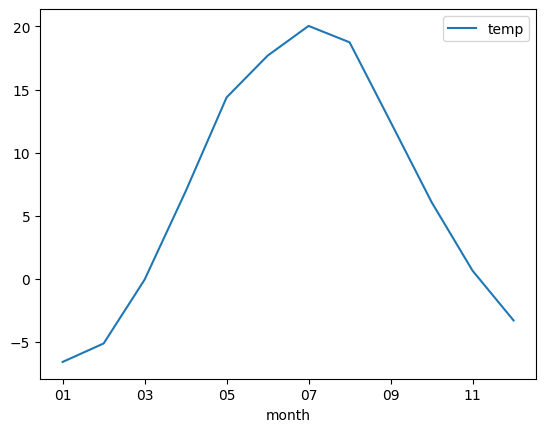

In [ ]:
df_2.groupby(['month'])['temp'].mean().plot(legend = True)

##### 3.2 График изменения температуры в течение года

Средняя температура в месяц (12 точек)

Такой же, как и 3.1, но построенный с помощью библиотеки seaborn

<Axes: xlabel='month', ylabel='temp'>

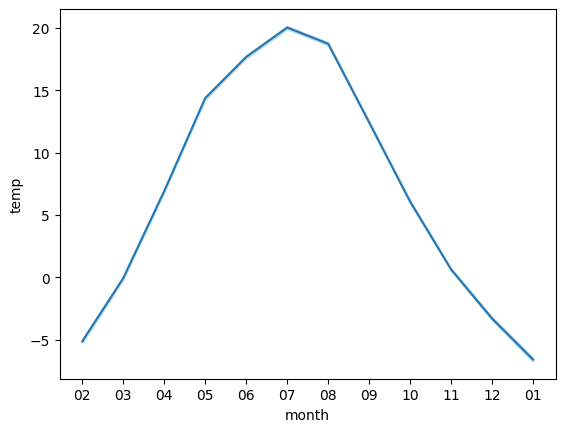

In [ ]:
sns.lineplot(data=df_2, x='month', y='temp')

##### 3.3 График изменения температуры в течение года

Фактически, то же самое, что и графики выше, но учитывается не средняя температура в месяц, а средняя температура в день, итого 365 точек - более точный и репрезентативный график

In [ ]:
df_2.groupby(['month', 'date'])['temp'].mean()

month  date
01     01     -2.626705
       02     -2.898295
       03     -4.042045
       04     -5.231250
       05     -6.352571
                 ...   
12     27     -3.531429
       28     -3.849714
       29     -5.084091
       30     -4.086364
       31     -3.712500
Name: temp, Length: 366, dtype: float64

<Axes: xlabel='month,date'>

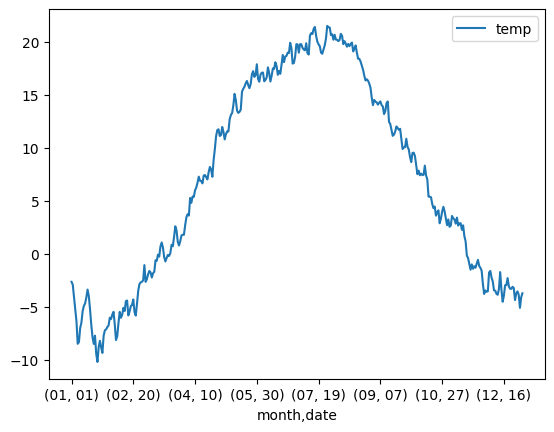

In [ ]:
df_2.groupby(['month', 'date'])['temp'].mean().plot(legend = True)

##### 3.4 График изменения температуры в течение года

Библиотека seaborn позволяет строить более красивые и информативные графики

12 boxplots отражают температуры в каждый из месяцев, показывая диапазон их изменения без учета выбросов (то есть, аномальных и не свойственных для Москвы температур)

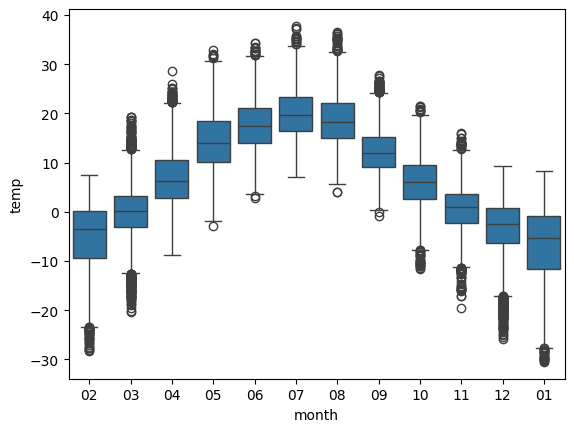

In [ ]:
sns.boxplot(data=df_2, x='month', y='temp');

##### 3.5 График изменения среднегодовой температуры с 2005 по 2023 год

В связи с тем, что в последнее время много говорят о глобальном потеплении, интересно посмотреть, сказывается ли оно на погоде в Москве.

Для этого найду среднее значение температуры в каждый год и среднее значение температуры по этим годам

По графику видно, что средняя температура за год и правда растет

In [ ]:
sr =  df_2.groupby(['year'])['temp'].mean()
sr

year
2005    7.057537
2006    5.662491
2007    7.203919
2008    7.287717
2009    6.218847
2010    6.583506
2011    6.781843
2012    5.956555
2013    5.337270
2014    6.938347
2015    6.939328
2016    6.670632
2017    6.359521
2018    6.660411
2019    7.839054
2020    8.044927
2021    6.603426
2022    6.979403
2023    7.516031
Name: temp, dtype: float64

TypeError: unsupported operand type(s) for +: 'Axes' and 'Axes'

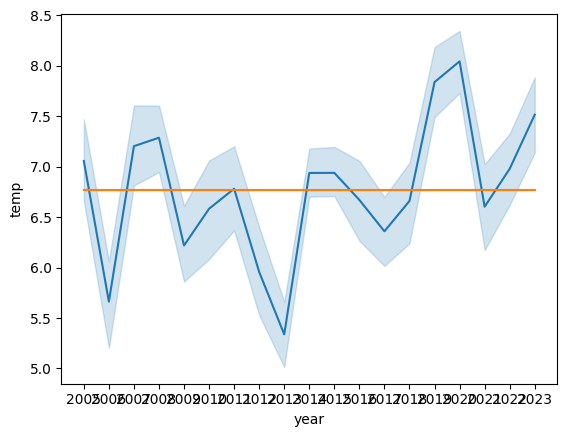

In [ ]:
sns.lineplot(data=df_2, x="year", y="temp") + sns.lineplot(data=df_2, x="year", y=sr.mean())

In [ ]:
df3 = df_2.query("year == '2005'")
df4 = df3.pivot(index="month", columns="time", values="temp")
df4.head()

ValueError: Index contains duplicate entries, cannot reshape

##### 3.6 Изменение температуры в течение месяца

На этом графике представлено изменение температуры в течение каждого из 12 месяцев. Из него тоже можно сделать довольно интересные выводы:

1. Часто февраль называют самым холодным месяцем, но на основе моих данных январь является самым холодным месяцем, на втором месте находится декабрь, а февраль лишь на третьем

2. Отчетливо видно распределение по сезонам: в течение 3 зимних и 3 летних месяцев графики практически горизонтальны, а вот в течение 3 осенних и 3 весенних месяцев заметна сильная разница между температурой в начале и в конце месяца

3. Летом похолодание начинается в середине августа

4. В конце декабря и начале января есть значительное потепление

<Axes: xlabel='date', ylabel='temp'>

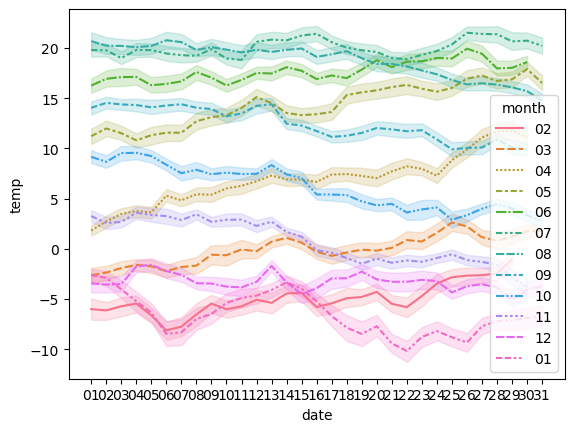

In [ ]:
sns.lineplot(data=df_2, x="date", y="temp", hue="month", style="month")